# Project 1

In [1]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
from sklearn.model_selection import train_test_split

In [11]:
# Imports for testing
from sklearn.model_selection import KFold # import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import datasets, linear_model
from sklearn import metrics

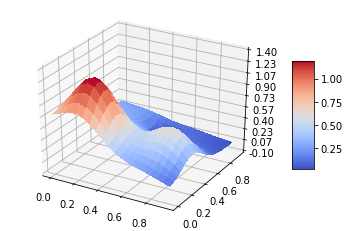

In [2]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### Part a): Ordinary Least Square (OLS) on the Franke function
- [ ] Up to fifth order, so polynomial of 5 order or that x and y are to the power of 5?
- [ ] What is confidence intervals of beta parameters? Just add a graph with var and MSE?
- [ ] Should we train several times? Or is that what bootstrapping for?
- [ ] 

In [3]:
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model)**2) / np.sum((y_data - np.mean(y_data))**2)

def MSE(y_data, y_model):
    n = np.size(y_model)
    return np.sum((y_data - y_model)**2)/n

In [4]:
# Credit to Jon Dahl and Michael
from numba import jit
@jit
def create_X(x, y, n ):
        if len(x.shape) > 1:
                x = np.ravel(x)
                y = np.ravel(y)

        N = len(x)
        l = int((n+1)*(n+2)/2)          # Number of elements in beta                                                               
        X = np.ones((N,l))

        for i in range(1,n+1):
                q = int((i)*(i+1)/2)
                for k in range(i+1):
                        X[:,q+k] = (x**(i-k))*(y**k)

        return X

In [5]:
np.random.seed(3155)

N = 200
noise_strength = 0.5
x = np.random.rand(N)
y = np.random.rand(N)

z = FrankeFunction(x, y)
z += np.random.uniform(0, 1, N) * noise_strength # noise

p = 2 # up to polynomial of degree 5

In [6]:
X_train, X_test, y_train, y_test = train_test_split(create_X(x, y, p), z, test_size = 0.2, shuffle = False)

X_train_mean = np.mean(X_train, axis = 0)
X_train_std = np.std(X_train, axis = 0)

#print("Mean: ", X_train_mean, " std: ", X_train_std)

X_train = (X_train - X_train_mean)/X_train_std
X_test = (X_test - X_train_mean)/X_train_std

# TODO: Without it there are Nan values, is this the correct way to fix this?
X_train[:, 0] = 1
X_test[:, 0] = 1

# Matrix inversion to find beta
beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
#print("beta:\n", beta)

# Are we supposed to train several times? Or is that bootstrapping?
# Make prediction
beta_optimal = X_train @ beta
print("Train: R2 ", R2(y_train, beta_optimal)) # ~ 1
print("Train: MSE ", MSE(y_train, beta_optimal)) # ~ 0
    
# Make prediction
beta_optimal = X_test @ beta
print("Test: R2 ", R2(y_test, beta_optimal)) # ~ 1
print("Test: MSE", MSE(y_test, beta_optimal)) # ~ 0

Train: R2  0.6411719073193289
Train: MSE  0.03497691600982657
Test: R2  0.5328173201173594
Test: MSE 0.050708446997643306


### Part b): Bias-variance trade-off and resamplng techniques

In [7]:
np.random.seed(3155)

# TODO: do I need to somehow sample from the FrankeFunction???
N = 200
noise_strength = 0.5
x = np.random.rand(N)
y = np.random.rand(N)

z = FrankeFunction(x, y)
z += np.random.uniform(0, 1, N) * noise_strength # noise

p = 15 # up to polynomial of degree 5

Polynomial degree: 1
Train: R2
 0.0
Train: MSE
 0.09747541155021351
Test: R2
 -0.14421957873926483
Test: MSE
 0.12419466808303163
Polynomial degree: 2
Train: R2
 0.5769657347013475
Train: MSE
 0.041235439109828353
Test: R2
 0.42504817554466656
Test: MSE
 0.062405811199840525
Polynomial degree: 3
Train: R2
 0.6411719073193289
Train: MSE
 0.03497691600982657
Test: R2
 0.5328173201173594
Test: MSE
 0.050708446997643306
Polynomial degree: 4
Train: R2
 0.7560926237351033
Train: MSE
 0.02377497188155358
Test: R2
 0.5783821064873019
Test: MSE
 0.045762802276440064
Polynomial degree: 5
Train: R2
 0.7942629454978883
Train: MSE
 0.02005430405872204
Test: R2
 0.687764946100911
Test: MSE
 0.03389028609841786
Polynomial degree: 6
Train: R2
 0.8073549274294269
Train: MSE
 0.018778157731937355
Test: R2
 0.7534058392113545
Test: MSE
 0.026765561889881172
Polynomial degree: 7
Train: R2
 0.8243847228862602
Train: MSE
 0.01711817141116658
Test: R2
 0.6200968997136191
Test: MSE
 0.04123503942815611
Polyno

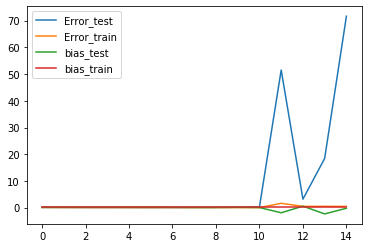

In [8]:
error_train = np.zeros(p)
bias_train = np.zeros(p)
variance_train = np.zeros(p)
polydegree = np.zeros(p)

error_test = np.zeros(p)
bias_test = np.zeros(p)
variance_test = np.zeros(p)
   
for degree in range(p):
    X = create_X(x, y, degree)
    X_train, X_test, y_train, y_test = train_test_split(X, z, test_size = 0.2, shuffle = False)

    X_train_mean = np.mean(X_train, axis = 0)
    X_train_std = np.std(X_train, axis = 0)

    #print("Mean: ", X_train_mean, " std: ", X_train_std)

    X_train = (X_train - X_train_mean)/X_train_std
    X_test = (X_test - X_train_mean)/X_train_std

    # TODO: Without it there are Nan values, is this the correct way to fix this?
    X_train[:, 0] = 1
    X_test[:, 0] = 1
    
    # Matrix inversion to find beta
    beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
    #print("beta:\n", beta)
    polydegree[degree] = degree
    print('Polynomial degree:', degree + 1)
    
    # Are we supposed to train several times? Or is that bootstrapping?
    # Make prediction
    beta_optimal = X_train @ beta
    print("Train: R2\n", R2(y_train, beta_optimal)) # ~ 1
    print("Train: MSE\n", MSE(y_train, beta_optimal)) # ~ 0
    
    error_train[degree] =  MSE(y_train, beta_optimal)
    bias_train[degree] = np.mean(y_train - np.mean(beta_optimal)**2)
    variance_train[degree] = np.var(beta_optimal)
        
    # Make prediction
    beta_optimal = X_test @ beta
    print("Test: R2\n", R2(y_test, beta_optimal)) # ~ 1
    print("Test: MSE\n", MSE(y_test, beta_optimal)) # ~ 0
    
    error_test[degree] =  MSE(y_test, beta_optimal)
    bias_test[degree] = np.mean(y_test - np.mean(beta_optimal)**2)
    variance_test[degree] = np.var(beta_optimal)
    #print('Error:', error[degree])
    #print('Bias^2:', bias[degree])
    #print('Var:', variance[degree])
    #print('{} >= {} + {} = {}'.format(error[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))

plt.plot(polydegree, error_test, label='Error_test')
plt.plot(polydegree, error_train, label='Error_train')
plt.plot(polydegree, bias_test, label='bias_test')
#plt.plot(polydegree, variance_test, label='Variance_test')
plt.plot(polydegree, bias_train, label='bias_train')
#plt.plot(polydegree, variance_train, label='Variance_train')
plt.legend()
plt.show()

### c) K-Fold CV

K = 5 
- Randomly partition data K-equally sizes sub samples
- For each fold train other folds and test on that fold, calculate error
- Average out error

#### TODOS:
- Rewrite K folds as array not reshaping and flattening
- Why are my results so super different? x)
- Do I need to run a check on testing as well?

In [15]:
k = 5

X_train, X_test, y_train, y_test = train_test_split(create_X(x, y, 8), z, test_size = 0.2, shuffle = False)

X_train_mean = np.mean(X_train, axis = 0)
X_train_std = np.std(X_train, axis = 0)

X_train = (X_train - X_train_mean)/X_train_std
X_test = (X_test - X_train_mean)/X_train_std

# TODO: Without it there are Nan values, is this the correct way to fix this?
X_train[:, 0] = 1
X_test[:, 0] = 1

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

kfold = KFold(n_splits = k)
scores = cross_val_score(model, X, z, scoring='neg_mean_squared_error', cv=kfold)
print("Cross-validated score from sklearn:", np.mean(-scores))

# Create k-folds
X_train = np.reshape(X_train, (k, -1, X_train.shape[1]))
y_train = np.reshape(y_train, (k, -1))

error_train = np.zeros(k)

indices = list(range(0, k))
for fold in range(k):
    # get all the training folds expect the fold index
    last_shape = X_train.shape[-1]
    fold_X_train = X_train[np.delete(indices, fold)].reshape(-1, last_shape)

    fold_Y_train = y_train[np.delete(indices, fold)].flatten()

    # Data will be used to validate
    fold_X_train_validation = X_train[fold].reshape(-1, last_shape)
    fold_Y_train_validation = y_train[fold].flatten()

    beta = np.linalg.inv(fold_X_train.T @ fold_X_train) @ fold_X_train.T @ fold_Y_train

    beta_optimal = fold_X_train_validation @ beta
    error_train[fold] =  MSE(fold_Y_train_validation, beta_optimal)
    
total_error = error_train.mean()
print("Cross-validated score manual: ", total_error)

Cross-validated score from sklearn: 45618.4777541652
Cross-validated score manual:  0.14115890484479948


### Part d): Ridge Regression on the Franke function  with resampling

1. Implement Ridge Regression
2. Preform bootstrap analysis as in b)
3. Preform cross-validation as in c) but now on dependence on $\lambda$
4. Comment on the differences

In [26]:

X_ridge = create_X(x, y, 8)
X_train, X_test, y_train, y_test = train_test_split(X_ridge, z, test_size = 0.2, shuffle = False)

U, s, V = np.linalg.svd(X_ridge) # goddamn magic
print(U.shape, s.shape, V.shape)

X_train_mean = np.mean(X_train, axis = 0)
X_train_std = np.std(X_train, axis = 0)

X_train = (X_train - X_train_mean)/X_train_std
X_test = (X_test - X_train_mean)/X_train_std

# TODO: Without it there are Nan values, is this the correct way to fix this?
X_train[:, 0] = 1
X_test[:, 0] = 1

ridge_lambda = 0.01

# TODO: use SVD instead of inv
beta = np.linalg.inv(X_train.T @ X_train + ridge_lambda * np.identity(X_train.shape[1])) @ X_train.T @ y_train

beta_optimal = (1/(1 + ridge_lambda)) * X_train @ beta
print("Train: R2 ", R2(y_train, beta_optimal)) # ~ 1
print("Train: MSE ", MSE(y_train, beta_optimal)) # ~ 0


(200, 200) (45,) (45, 45)
Train: R2  0.8072955872121694
Train: MSE  0.018783941944036008
